# College Data Frame Supervised Analysis
This is an analysis of the College data frame provided in the ISLR package. The data frame contains information from 777 colleges with 18 features. This information can be obtained by the help function, as well as information such as the source of the data, formatting, and references. 
This analysis will also require the tidyverse package.

In [61]:
library(ISLR)
library(ggplot2)
attach(College)
help(College)

From the summary below, the following are observed:
- 565 of the 777 colleges are private
- The mean graduation rate is 65.46%

In [3]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

The scatterplot below shows the positive correlation between the percentage of students in the colleges who were in the top 10% of their high school class, displayed on the x axis, and the cost of out of state tuition, displayed on the y axis. As the percentage of students from the top 10% of their high school class increases, the out-of-state tuition cost increases. 

The the geom_jitter function is used to avoid overplotting. The data points are overlayed with a smoothed line and 95% confidence bands. The confidence intervals at either end of the graph are larger at either end because there are less data points in those areas. This implies the varaince is larger in the colleges with the majority or minority of their students who were in the top 10% of their high school class. The greater varaince means the confidence intervals must be larger to be certain in estimating the relationship.

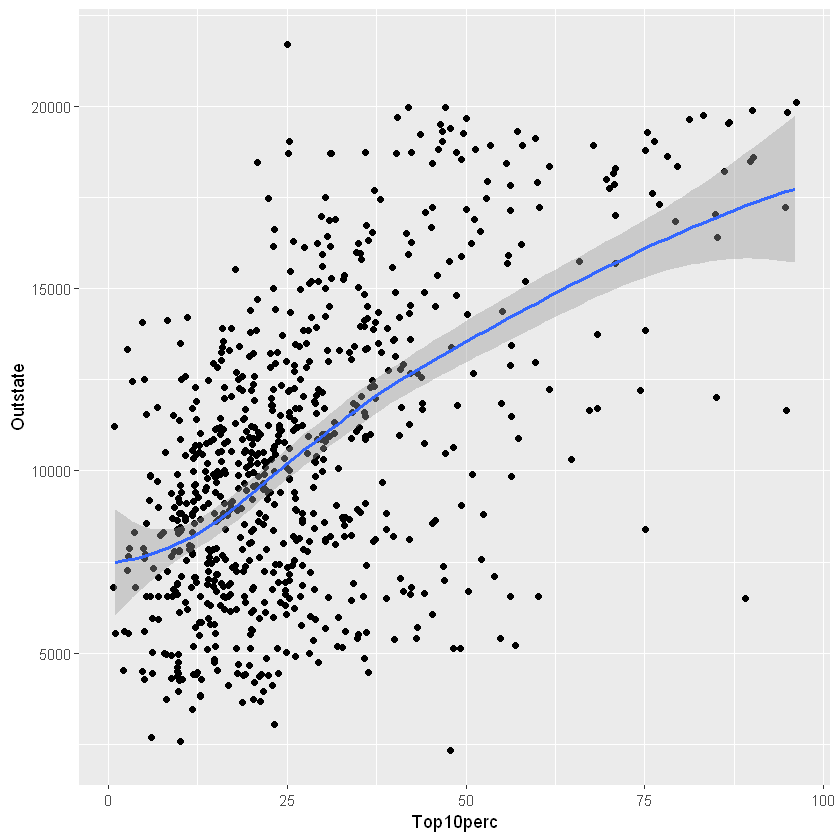

In [35]:
ggplot(mapping = aes(x = Top10perc, y = Outstate)) + geom_jitter() + geom_smooth(method="loess")

The scatterplot below further explores the data above, separating the public and private schools by color as shown on the legend to the right. From this plot, one can conclude that the private colleges from this sample have higher out-of-state tuition than the public colleges. 

This scatterplot also has the 95% confidence intervals and utilizes the geom_jitter function to prevent overplotting.

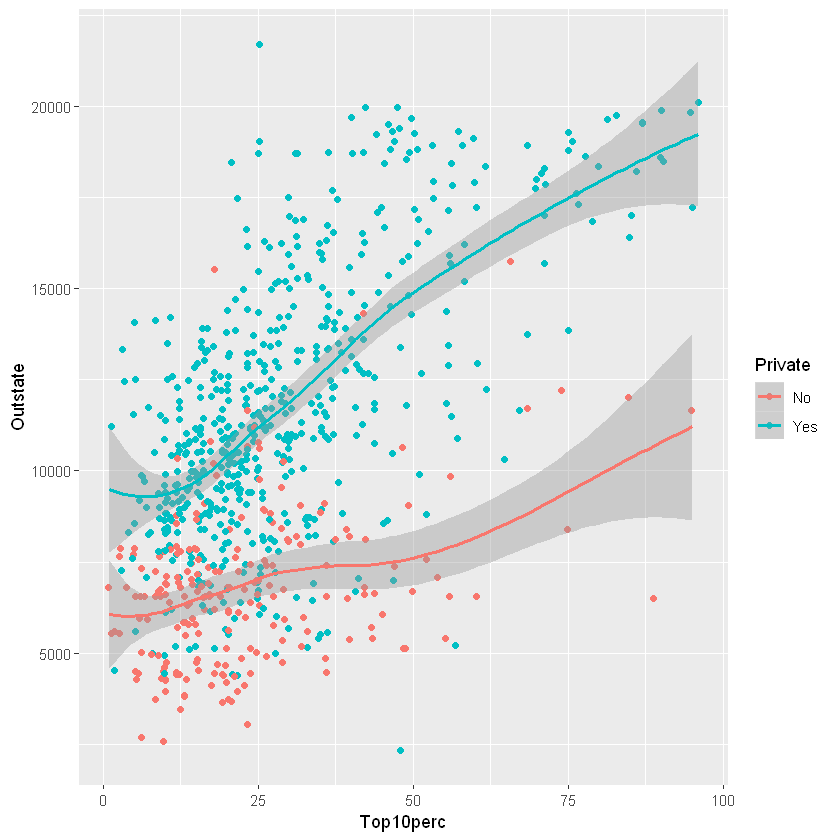

In [36]:
ggplot(mapping = aes(x = Top10perc, y = Outstate, color = Private)) + geom_jitter() + geom_smooth(method="loess")

The facet_wrap function is used below to create side by side scatterplots separating the data for public colleges and private colleges. From this comparison of the data within this sample, one can conclude that private colleges generally have higher tuition.

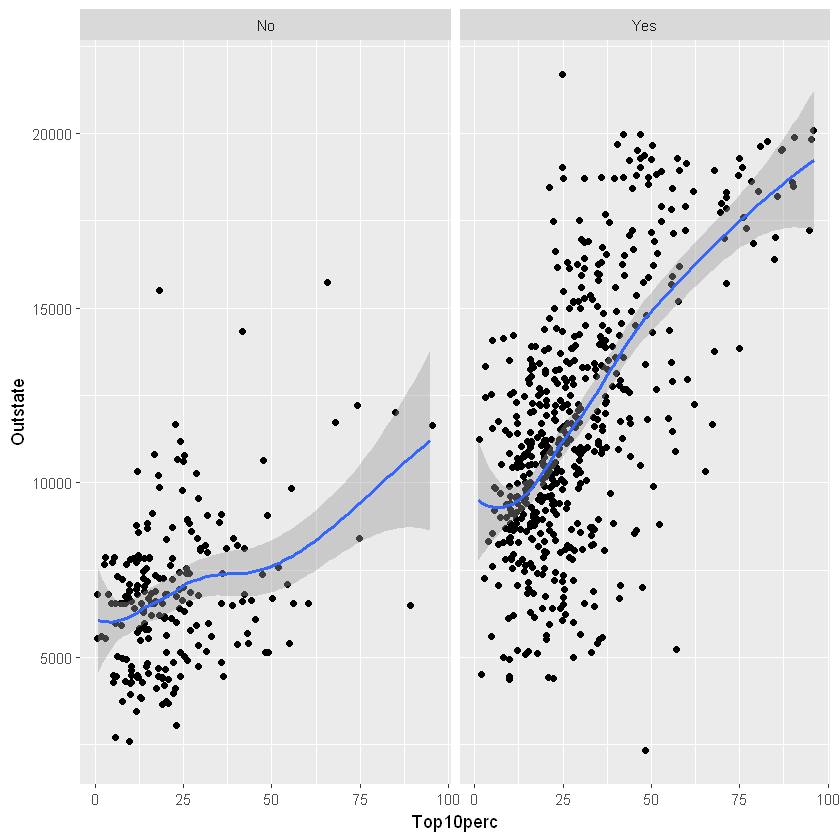

In [40]:
ggplot(data = College, mapping = aes(x = Top10perc, y = Outstate)) + geom_jitter() + geom_smooth(method="loess") + 
facet_wrap(~ Private)

## Fitting The Model with Linear Regression

In [7]:
lm.fit <- lm(formula = Outstate ~ Top10perc)
lm.fit


Call:
lm(formula = Outstate ~ Top10perc)

Coefficients:
(Intercept)    Top10perc  
     6906.5        128.2  


The rate at which the cost of out-of-state tuition rises as the percentage of students that were in the top 10% of their class rises is 128.2.
B<sub>0</sub>: y intercept
B<sub>1</sub>: slope

In [8]:
# confidence intervals
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),6471.4241,7341.4931
Top10perc,114.9459,141.5415


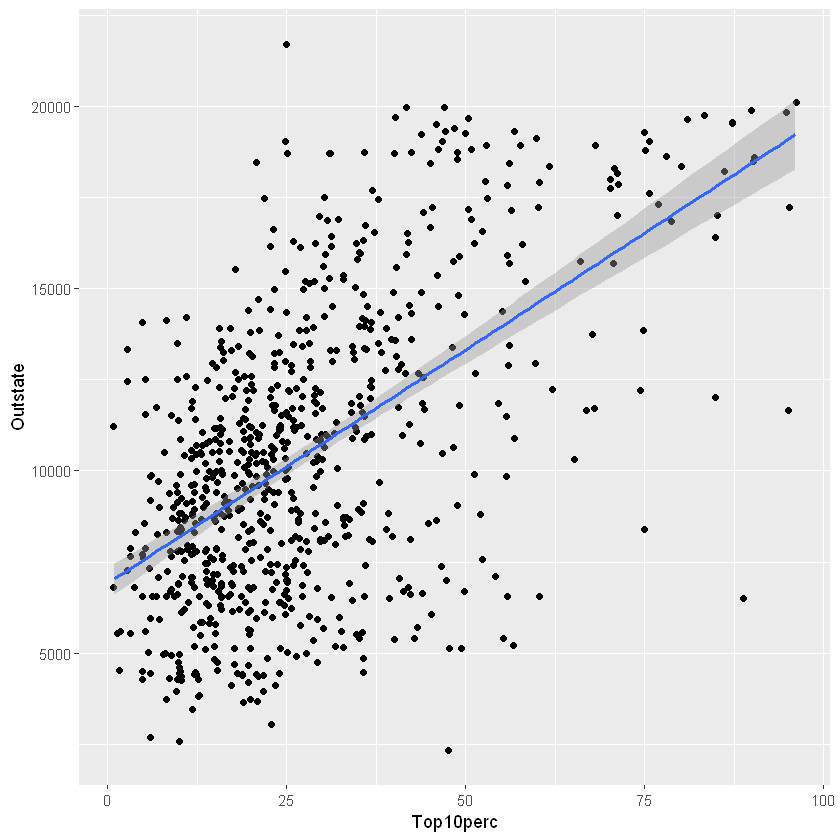

In [10]:
ggplot(mapping = aes(x = Top10perc, y = Outstate)) + geom_jitter() + geom_smooth(method = "lm")

## Making Predictions
Below is a point estimate, 11138.5, for predicted out-of-state tuition of a college when 33% of its students are from the top 10% of their high school class.

95% confidence interval: [10893.16, 11383.84]

In [9]:
predict(lm.fit, data.frame(Top10perc = c(33)), interval = "confidence")

fit,lwr,upr
11138.5,10893.16,11383.84


## Hypothesis Testing
The goal is to evaluate the linear relationship between college's out-of-state tuition and the percentage of students from the top 10% of their high school class.
H<sub>0</sub>: B<sub>1</sub> = 0

H<sub>A</sub>: B<sub>1</sub> $\neq$ 0

The summary below provides the following:
- Test statistic: 𝑡 = 18.93
- 𝑝 value: 𝑝 < 2 × 10<sup>−16<sup>

In [11]:
summary(lm.fit)


Call:
lm(formula = Outstate ~ Top10perc)

Residuals:
     Min       1Q   Median       3Q      Max 
-11831.1  -2418.4    211.1   2116.4  11587.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6906.459    221.614   31.16   <2e-16 ***
Top10perc    128.244      6.774   18.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3329 on 775 degrees of freedom
Multiple R-squared:  0.3162,	Adjusted R-squared:  0.3153 
F-statistic: 358.4 on 1 and 775 DF,  p-value: < 2.2e-16


The p value is below th typical threshold of either 0.05 or 0.01. We can conclude that the data support the alternative hypothesis, and reject the null hypothesis. This means the data support that there is a linear relationship between a college's out-of-state tuition and the percentage of students from the top 10% of their high school class. 

## Examine the Fit of the Least Squares Linear Model
The plot below shows the least squares regression line with vertical statements representing the residuals. The residuals represent the distance each point is from the predicted linear regression model.

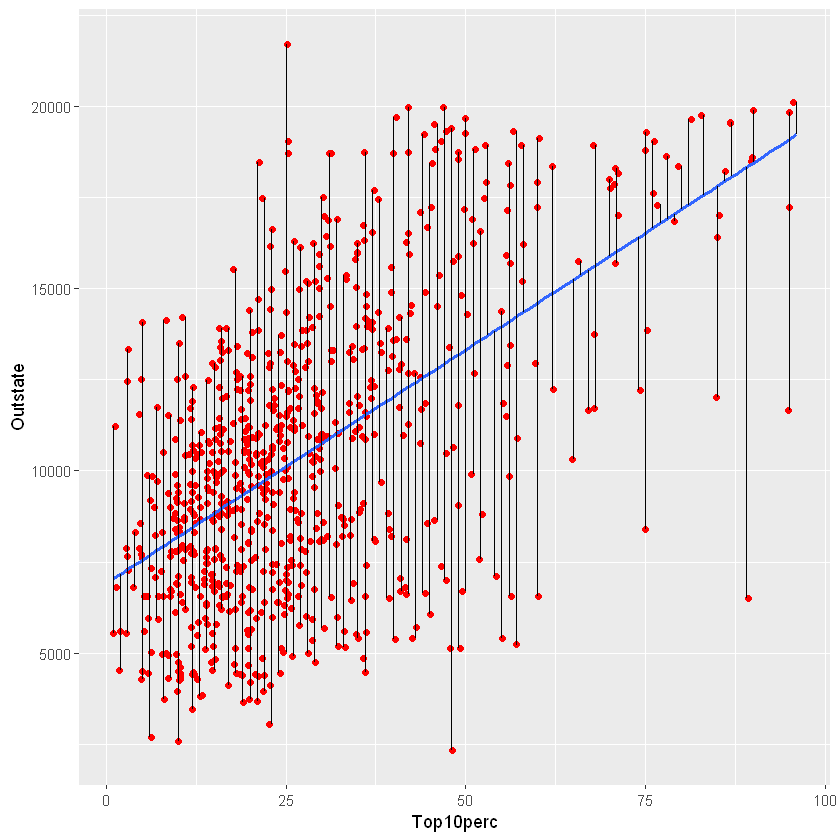

In [12]:
ggplot(data = lm.fit, mapping = aes(x = Top10perc, y = Outstate)) + geom_jitter(color = "red") + 
geom_smooth(method = "lm", se = FALSE) + 
geom_segment(mapping = aes (xend = Top10perc, yend = .fitted))

The following information comes from the summary below:
- RSE: 3229 --- the average deviation between observed and predicted out-of-state tuition in dollars
- R<sup>2</sup>: 0.3162 --- the proportion of variation in a college's out-of-state tuition can be explained by the percentage of students from the top 10% of their high school class

In [13]:
summary(lm.fit)


Call:
lm(formula = Outstate ~ Top10perc)

Residuals:
     Min       1Q   Median       3Q      Max 
-11831.1  -2418.4    211.1   2116.4  11587.4 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6906.459    221.614   31.16   <2e-16 ***
Top10perc    128.244      6.774   18.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3329 on 775 degrees of freedom
Multiple R-squared:  0.3162,	Adjusted R-squared:  0.3153 
F-statistic: 358.4 on 1 and 775 DF,  p-value: < 2.2e-16


## Future Improvements 
We observed a difference in out-of-state tuition between public and private colleges. This means there is at least one feature in the dataset that is related to the reponse. The fit of the linear model to the data could be improved by adding more features to the linear model.

## Fitting a Multiple Linear Regression Model
This model will be used to make predictions about college's out-of-state tuition from all other variables in College.

In [15]:
lm.fit2 <- lm(Outstate~., data = College)

H<sub>0</sub>: B<sub>1</sub> = B<sub>2</sub> ... = B<sub>k</sub> = 0
k = 17

The summary below provides the following information:
- F statistic: 148.1 on 17 and 759 DF
- 𝑝 value:<2.2e-16
- Residual standard error: 1958 
- Multiple R-squared: 0.7684

In [16]:
summary(lm.fit2)


Call:
lm(formula = Outstate ~ ., data = College)

Residuals:
    Min      1Q  Median      3Q     Max 
-6782.6 -1267.5   -40.9  1244.5  9953.3 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.587e+03  7.660e+02  -2.072  0.03860 *  
PrivateYes   2.264e+03  2.480e+02   9.128  < 2e-16 ***
Apps        -3.034e-01  6.734e-02  -4.506 7.64e-06 ***
Accept       8.124e-01  1.293e-01   6.286 5.51e-10 ***
Enroll      -5.492e-01  3.541e-01  -1.551  0.12134    
Top10perc    2.834e+01  1.098e+01   2.582  0.01002 *  
Top25perc   -3.779e+00  8.475e+00  -0.446  0.65576    
F.Undergrad -9.567e-02  6.152e-02  -1.555  0.12038    
P.Undergrad  1.166e-02  6.049e-02   0.193  0.84720    
Room.Board   8.816e-01  8.558e-02  10.302  < 2e-16 ***
Books       -4.592e-01  4.479e-01  -1.025  0.30551    
Personal    -2.294e-01  1.183e-01  -1.940  0.05280 .  
PhD          1.124e+01  8.730e+00   1.288  0.19822    
Terminal     2.467e+01  9.538e+00   2.587  0.00988 ** 
S.F.Ratio   -4.6

The null hypothesis is rejected because the p value associated with the F statistic is smaller than the typical threshold of 0.05. The F statistic being such a large value means that it will be on the extreme end of the single tail in the distribution. We can conclude that the null hypothesis would be very unlikely given the F statistics position in the distribution and the associated 𝑝 value. 

We reject H<sub>0</sub>: B<sub>1</sub> = B<sub>2</sub> ... = B<sub>k</sub> = 0 and conclude that the data support H<sub>A</sub>: B<sub>1</sub> = B<sub>2</sub> ... = B<sub>k</sub> $\neq$ 0.

The conclusion above means the data support that there is a linear relationship between the response, out of state tuition, and at least one of the other features.

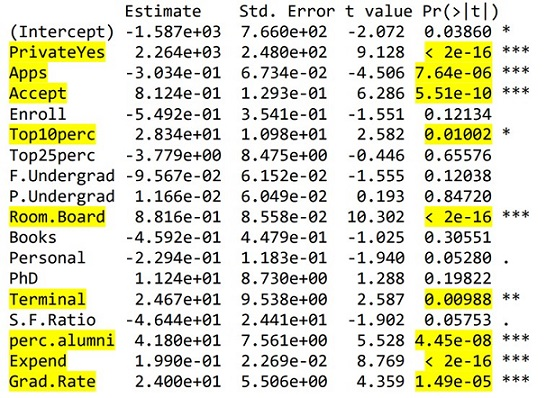

In [45]:
library("IRdisplay")
display_png(file="Picture1.jpg")  

The highlighted values above are linearly related to the college’s out-of-state tuition because of their t values being small (less than .05). These small t values support the data being very unlikely under the null hypothesis, rejecting the null ypothesis, and supporting the alternative hypothesis that there is a linear relationship between those highlighted variables and the repsonse.

The PrivateYes feature represents the students from private colleges with a value of 1, and 0 if they attended a public college. The data supports that there is a linear relationship between attending a private college and the out of state tuition. The average out of state tuition increases by 2.264<sup>3</sup> units when the value for PrivateYes has a value of 1 rather than a value of zero. This means that if the college is private, the out of state tuition would be 2.264<sup>3</sup> units more than a public school. 

The statistics from the simple linear regression were: Residual standard error: 3329, Multiple R-squared: 0.3162. The statistics from the multiple linear regression were Residual standard error: 1958, Multiple R-squared: 0.7684. The multiple linear regression was a better fit based on both statistics. The larger value for Multiple R-squared from the multiple linear 
regression demonstrates a larger proportion of variance in the college’s out-of-state tuition that can be explained by the features in the model. The smaller RSE value of the multiple linear regression estimates a lower “lack of fit” of the model in comparison to the larger “lack of fit” from the simple linear regression. 

## Making Predictions After Applying KNN
This will require use of the class package.

Below, rows 1-500 are designated as training data, and rows 501-777 as the test data.

In [47]:
library(class)

train <- seq(1, 500)
train.X <-  cbind(Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, 
Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate, 
Outstate)[train, ] 

test <- seq(501, 777) 
test.X <- cbind(Apps, Accept, Enroll, Top10perc, Top25perc, F.Undergrad, P.Undergrad, 
Room.Board, Books, Personal, PhD, Terminal, S.F.Ratio, perc.alumni, Expend, Grad.Rate, 
Outstate)[test, ]

In [50]:
train.Y <- Private[train] 
set.seed(1) 
knn.pred1 <- knn(train.X, test.X, train.Y, k = 1) 
summary(knn.pred1)

No Yes 
 98 179

The summary above shows that 179 colleges in the test data are classified by KNN as private when K = 1.

In [51]:
set.seed(1) 
knn.pred10 <- knn(train.X, test.X, train.Y, k = 10) 
summary(knn.pred10) 

No Yes 
102 175

The summary above shows that 175 colleges in the test data are classified by KNN as private when K = 10.

In [52]:
set.seed(1) 
knn.pred100 <- knn(train.X, test.X, train.Y, k = 100) 
summary(knn.pred100) 

No Yes 
 80 197

The summary above shows that 197 colleges in the test data are classified by KNN as private when K = 100.




In [54]:
# vector of true test classes
test.Y <- Private[test]

# predicted vs. true classes
table(knn.pred1, test.Y) 

         test.Y
knn.pred1  No Yes
      No   92   6
      Yes  25 154

There are more false positive incorrect predictions(25) than false negative predictions(6). This means the incorrect  redictions are mostly classifying the public colleges as private when K = 1.

In [55]:
table(knn.pred10, test.Y)

          test.Y
knn.pred10  No Yes
       No   99   3
       Yes  18 157

There are more false positive incorrect predictions(18) than false negative predictions(3). This means the incorrect predictions are mostly classifying the public colleges as private when k=10.

In [56]:
table(knn.pred100, test.Y)

           test.Y
knn.pred100  No Yes
        No   79   1
        Yes  38 159

There are more false positive incorrect predictions(38) than false negative predictions(1). This means the incorrect predictions are mostly classifying the public colleges as private when k=100. 

## Accuracy Rates for KNN Classifier

In [57]:
mean(knn.pred1 == test.Y) 

[1] 0.8880866

In [58]:
mean(knn.pred10 == test.Y) 

[1] 0.9241877

In [59]:
mean(knn.pred100 == test.Y) 

[1] 0.8592058

When K = 10, the mean for accuracy was the highest at 92%. This value would have the shape that is the closest to the Bayes decision boundary, because it had the highest accuracy score. Bayes decision boundary is the shape that has the lowest possible error rate, therefore, the k value (k=10) with the highest accuracy rate would be the closest in shape to the Bayes decision boundary.